# Model Explainability
- https://www.analyticsvidhya.com/blog/2021/11/model-explainability/
- https://docs.aws.amazon.com/whitepapers/latest/model-explainability-aws-ai-ml/interpretability-versus-explainability.html

- refers to the concept of being able to explain and understand the machine learning model
- e.g., if a healthcare model is predicting whether a patient has a particular disease, the medical practitioners need to know what  parameters the model is takin into account to verify if the model contains any bias

## Why Model explainability?

- increase trust on the model
- detect if there is any bias present in the model
- important while debugging a model during the development phase
- critical for getting models to be vetted by regulatory authorities like FDA

## Interpretability vs explainability

- commonly interchangeble
- interpretability makes the model more transparent (glassbox and not blackbox)
- businesses can, e.g, understand exactly why and how the model is generating predications
    - observe the inner mechanics of the AI/ML models
    - model's weights and features to determine the given output
    
## Performance vs Interpretability

- as the performance improves, interpretability may normally decrease

## Ways to interpret a model
- two ways Global vs Local

### Global Interpretation
- overall interpretation of all overall structure of input
- explain the complete behavior of the model
- explain the suitability of model for deployment
- E.g.: predicting the risk of disease in patients

### Local Interpretation

- understand how the model makes decision for a single instance
- explain the individual predictions
- understand the behavior of the model in the local neighborhood
- E.g., explain why a specific person has a high risk of a disease

## Methods for Local Intepretation

## LIME - Local Interpretable Model-Agonistic Explanations

- helps understand how feature values impact on a single data sample
- LIME interprets machine learning models by creating a "local" surrogate model around a specific data point, essentially approximating the complex black-box model's behavior in that immediate area
    - allows you to understand which features most influenced the prediction for that particular data point

### Key points about LIME

#### Model-agnostic
- LIME can be applied to any machine learning model, regardless of its internal structure, as it only needs to be able to make predictions on new data points. 

#### Local interpretation
- It focuses on explaining the prediction for a single data point, not the entire model globally. 

#### Perturbation technique
- LIME generates slightly modified versions of the data point to understand how changes in features affect the model's prediction. 

#### Surrogate model 
- LIME fits a simple, interpretable model (like linear regression or a decision tree) to the perturbed data and its predictions to explain the original model's behavior locally

#### How LIME works in practice

- Documentation - https://lime-ml.readthedocs.io/en/latest/index.html

1. Select a data point:
    - Choose the specific data point you want to understand the prediction for. 
2. Generate perturbations:
    - Create slightly modified versions of the data point by changing feature values slightly. 
3. Predict with the black-box model:
    - Feed both the original data point and the perturbed data points into the black-box model to get predictions for each. 
4. Weight the perturbed data:
    - Assign weights to the perturbed data points based on their similarity to the original data point. 
5. Fit a local model:
    - Train a simple, interpretable model (like linear regression) on the weighted perturbed data and its predictions. 
6. Interpret the local model:
    - Analyze the coefficients of the local model to understand which features had the most significant impact on the prediction for the original data point. 

### Case Study: Pima Indians Diabetes Database
- found here - https://github.com/priyankadalmia/medium/blob/main/diabetes.csv
- let's experiment with the dataset

In [3]:
import pandas as pd
import numpy as np
import warnings

In [4]:
warnings.filterwarnings('ignore')

In [5]:
ds_url = 'https://raw.githubusercontent.com/priyankadalmia/Blog/main/diabetes.csv'
diabetes_df = pd.read_csv(ds_url)

In [6]:
diabetes_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [7]:
diabetes_df.shape

(768, 9)

In [8]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
diabetes_df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [10]:
feature_names = list(diabetes_df.columns)

In [11]:
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [12]:
feature_names.remove("Outcome")

In [13]:
# Split the dataset
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, \
y_train, y_test = train_test_split( diabetes_df[feature_names],
                                    diabetes_df.Outcome,
                                    test_size = 0.3,
                                    random_state = 100)

In [15]:
X_train.shape

(537, 8)

In [16]:
X_test.shape

(231, 8)

In [17]:
# Build a random forest model
#from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#rf_clf = RandomForestClassifier( n_estimators = 100,
#                                 max_features = 0.2,
#                                 max_depth = 10,
#                                 max_samples = 0.5)
lr_clf = LogisticRegression()

In [18]:
lr_clf.fit(X_train, y_train)

LogisticRegression()

In [19]:
y_pred_prob = lr_clf.predict_proba( X_test )[:,1]
y_pred = lr_clf.predict( X_test )

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
y_test

173    0
253    0
207    1
737    0
191    0
      ..
259    1
512    0
111    1
548    0
680    0
Name: Outcome, Length: 231, dtype: int64

In [22]:
acc = accuracy_score(y_test, y_pred)

In [23]:
acc

0.7489177489177489

### LIME - Local Intrepretation of Model Explanation

#### Install Lime
```bash
conda install -c conda-forge lime
pip install lime
```

In [24]:
! pip install lime

In [25]:
import lime

In [26]:
lime_explainer = (lime
                  .lime_tabular
                    .LimeTabularExplainer(training_data = X_train.to_numpy(), 
                                   training_labels = y_train,                                   
                                   feature_names = feature_names, 
                                   class_names = ['Non-diabetes','Diabetes'],
                                   kernel_width=3,
                                   verbose = True ))

#### Explaining a case of Non-Diabetes

In [27]:
X_test.iloc[0]

Pregnancies                  1.000
Glucose                     79.000
BloodPressure               60.000
SkinThickness               42.000
Insulin                     48.000
BMI                         43.500
DiabetesPedigreeFunction     0.678
Age                         23.000
Name: 173, dtype: float64

In [28]:
y_test.iloc[0]

np.int64(0)

In [29]:
exp = lime_explainer.explain_instance( X_test.iloc[0].to_numpy(), 
                                  lr_clf.predict_proba )

Intercept 0.3538277553727339
Prediction_local [0.34612561]
Right: 0.18561746146991118


In [30]:
# let's see some visual explanation
exp.show_in_notebook(show_table=True, show_all=False)

#### Explaining a case of Diabetes

In [50]:
exp = lime_explainer.explain_instance( X_test.iloc[5].to_numpy(), 
                                  lr_clf.predict_proba )

Intercept 0.17294795869128954
Prediction_local [0.84781035]
Right: 0.7507900515558235


In [51]:
exp.show_in_notebook(show_table=True, show_all=False)

## SHAP (SHapley Additive exPlanations)

- Documentation - https://shap.readthedocs.io/en/latest/
- SHAP is a unified approach to explain the output of any machine learning model
- SHAP interprets models by calculating the contribution of each feature to a prediction, essentially assigning a "Shapley value" to each feature, which represents how much that feature impacts the final output of the model
- allows for a breakdown of how different features influence a specific prediction based on game theory concepts; this provides a transparent way to understand the reasoning behind a model's decision for each individual data point 

### Key points about SHAP:

#### Game Theory Approach:

- SHAP leverages concepts from cooperative game theory, where each feature is considered a "player" contributing to the final prediction, and the Shapley value determines each player's relative contribution

#### Feature Importance:

- SHAP value of each feature allows you to assess the relative importance of that feature in driving the model's prediction 

#### Local Explanations:

- SHAP provides explanations for individual predictions
    - meaning you can understand why a specific data point received the predicted outcome based on the contributions of each feature 

#### Model Agnostic:

- SHAP can be applied to any machine learning model, regardless of its complexity, as it only requires the model's predictions on the data 

### How SHAP works:

#### Feature Permutations:

- For each data point, SHAP calculates the contribution of a feature by considering all possible combinations of features (like adding or removing a feature) and comparing the model's output with and without that feature 

#### Average Marginal Contribution:

- the Shapley value for a feature is essentially the average of the difference in predictions caused by adding or removing that feature across all possible combinations of features. 

#### Visualization:

- SHAP values can be visualized using various plots like bar charts, waterfall plots, or dependence plots to easily understand which features have the most significant 

#### Cons
- only drawback of SHAP is its higher computating time

### Install SHAP

```bash
pip install shap
```

In [33]:
#! pip install shap==0.41.0
! pip install shap 

In [34]:
! pip list | grep shap

shap                      0.46.0


## Summarize the effect of all the features

In [35]:
import shap
shap.initjs()

In [36]:
X_train.shape, X_test.shape

((537, 8), (231, 8))

In [37]:
shap_explainer = shap.Explainer(lr_clf, X_train, feature_names=X_train.columns)

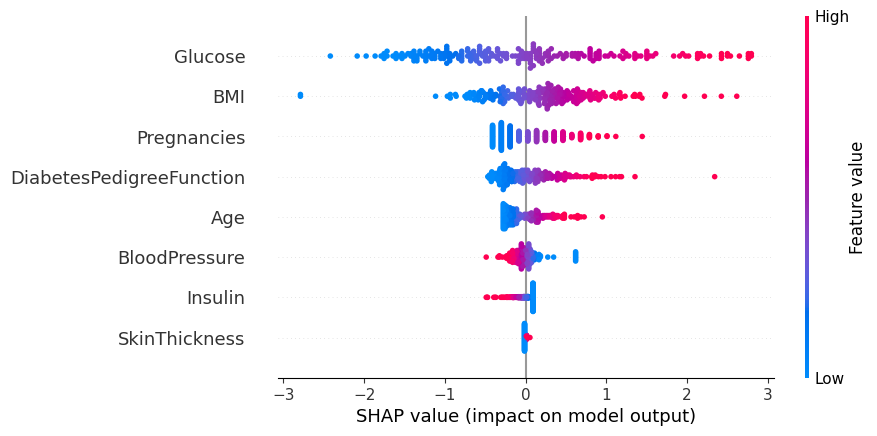

In [38]:
shap.plots.beeswarm(shap_explainer(X_test))

### Interpretation of SHAP chart

#### X-Axis: 
- The SHAP value of each feature, which represents the impact on the model’s output (prediction)
- a positive value pushes the prediction higher, while a negative value pushes it lower.
#### Y-Axis:
- the different features used in the model, sorted by their importance (average absolute SHAP value)
- More important features are at the top

#### Color Representation
- The color of each point represents the actual value of that feature for a particular instance
- Red (or light colors) → High feature values.
- Blue (or dark colors) → Low feature values.

#### Interpreting the Distribution of Points
- each dot represents a single instance in the dataset
- The spread of dots along the X-axis shows the range of SHAP values for that feature
- If high values of a feature (red dots) are mostly on the right (positive SHAP values), it means that high feature values increase the prediction.
- If low values of a feature (blue dots) are mostly on the right, it means low feature values increase the prediction.
- If dots are tightly clustered around zero, the feature has little impact on the model’s prediction

### Case Study: Pima Indians Diabetes Database
- Glucose level is the most important feature in predicting diabetes followed by BMI
- high Glucose levels and BMI increase the risk of diabetes
- Skin thickness and Insulin levels are the least important features

#### Explaining a case of Non-diabetes
- 0 - Non-diabetes
- 1 - Diabetes

In [40]:
# let's look into the first sample in the test set
inst_id = 0

In [41]:
lr_clf.predict_proba(X_test.iloc[inst_id:inst_id+1])

array([[0.81438254, 0.18561746]])

In [42]:
# explain single prediction from the test set
shap_values = shap_explainer(X_test)
shap.plots.force(shap_values[inst_id])

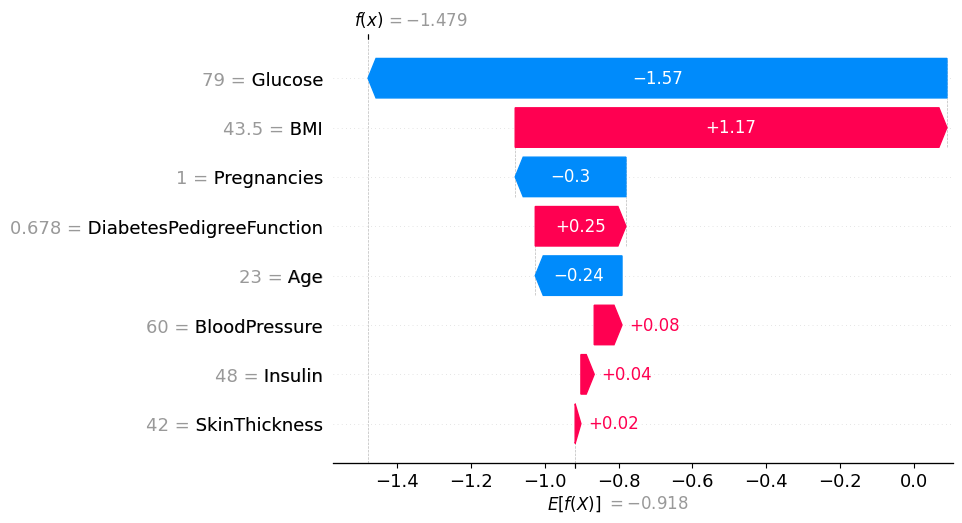

In [48]:
shap.plots.waterfall(shap_values[inst_id])

#### Explaining a case of Diabetes

In [43]:
diabetes_id = 5
lr_clf.predict_proba(X_test.iloc[diabetes_id:diabetes_id+1])

array([[0.24920995, 0.75079005]])

In [44]:
shap.plots.force(shap_values[diabetes_id])

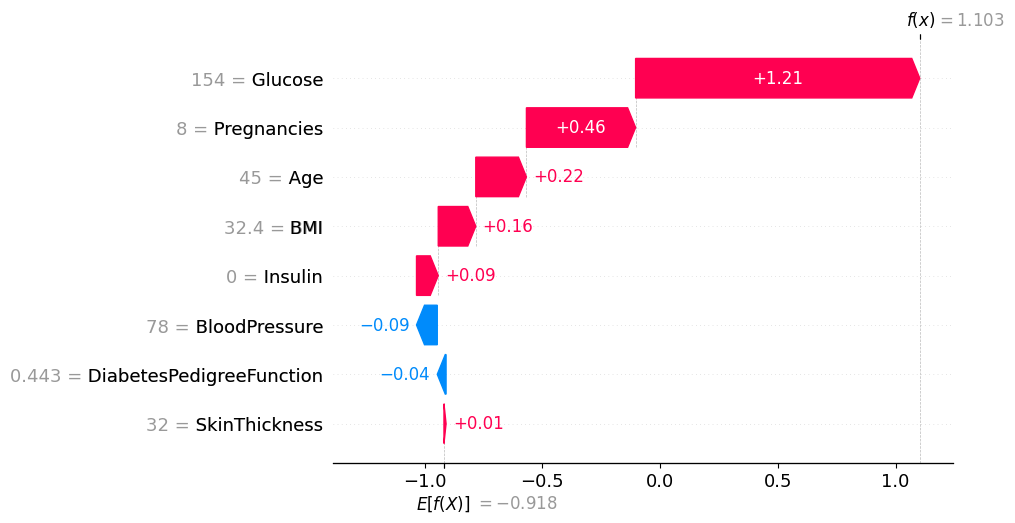

In [52]:
shap.plots.waterfall(shap_values[diabetes_id])

In [47]:
shap.initjs()
shap.plots.force(shap_values)